In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv( 'span_by_ope_category.csv' ,comment ='#')
data

,分類,術前,術後
0,総数,4.5,13.0
1,開頭手術,7.7,45.4
2,開胸手術,5.7,21.0
3,開腹手術,5.5,14.4
4,筋骨格系手術(四肢体幹),4.3,22.6
5,腹腔鏡下手術,4.9,9.2
6,胸腔鏡下手術,3.9,10.2
7,その他の内視鏡下手術,4.7,8.8
8,経皮的血管内手術,5.3,9.2
9,その他,4.0,10.6


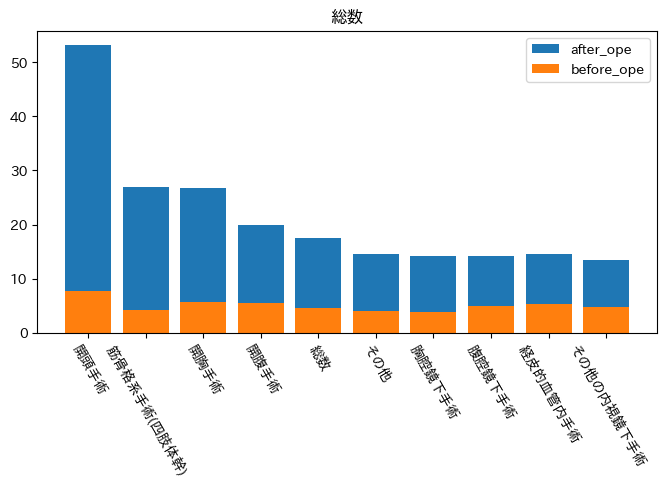

In [43]:
temp = data.sort_values('術後',ascending=False)
labels = temp['分類']
before_ope = temp['術前']
after_ope = temp['術後']

total = [num1 + num2 for num1,num2 in zip(before_ope,after_ope)]

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
plt.xticks(rotation=-60)
plt.title('総数')
ax.bar(labels,total,label='after_ope')
ax.bar(labels,before_ope,label='before_ope')
ax.legend()

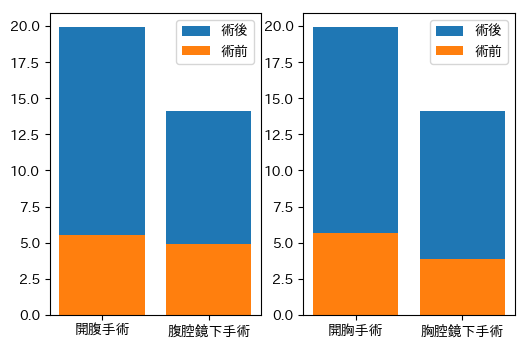

In [54]:
stomach = data.query("分類 == '開腹手術' | 分類 == '腹腔鏡下手術'")
labels_stomach = stomach['分類']
before_ope_stomach = stomach['術前']
after_ope_stomach = stomach['術後']

total_stomach = [num1 + num2 for num1,num2 in zip(before_ope_stomach,after_ope_stomach)]

fig, ax = plt.subplots(1, 2, figsize=(6, 4), dpi=100)
ax[0].bar(labels_stomach,total_stomach,label='術後')
ax[0].bar(labels_stomach,before_ope_stomach,label='術前')
ax[0].legend()


breast = data.query("分類 == '開胸手術' | 分類 == '胸腔鏡下手術'")
labels_breast = breast['分類']
before_ope_breast = breast['術前']
after_ope_breast = breast['術後']

total_breast = [num1 + num2 for num1,num2 in zip(before_ope_stomach,after_ope_stomach)]
ax[1].bar(labels_breast,total_breast,label='術後')
ax[1].bar(labels_breast,before_ope_breast,label='術前')
ax[1].legend()



In [104]:
data = pd.read_csv( 'span_in_hospital.csv' ,comment ='#')
 
data.head(20)

,期間,分類,全国,北海道,青森,岩手,宮城,秋田,山形,福島,...,愛媛,高知,福岡,佐賀,長崎,熊本,大分,宮崎,鹿児島,沖縄
0,術前,総数,4.5,6.4,3.7,3.4,3.4,3.7,3.7,6.0,...,4.4,8.5,4.0,2.8,3.5,3.1,6.5,3.3,5.7,3.4
1,術前,開頭手術,7.7,4.7,4.6,5.5,5.4,9.8,5.3,4.1,...,7.0,4.0,4.0,3.9,2.9,2.4,3.3,8.1,9.4,3.2
2,術前,開胸手術,5.7,6.9,6.0,2.0,7.6,6.4,5.8,4.8,...,5.9,5.8,6.5,3.9,4.5,3.5,3.5,4.9,4.8,7.4
3,術前,開腹手術,5.5,7.3,4.4,4.0,4.2,5.4,8.0,4.8,...,6.8,2.9,4.0,4.8,4.5,4.0,3.9,5.6,4.4,3.4
4,術前,筋骨格系手術(四肢体幹),4.3,6.1,5.5,4.9,4.8,5.2,3.1,3.3,...,4.3,2.9,3.3,2.3,3.1,2.9,3.9,3.4,3.7,3.8
5,術前,腹腔鏡下手術,4.9,5.6,4.1,2.7,5.8,3.7,3.0,3.6,...,4.0,2.1,3.0,3.5,3.4,2.3,12.4,4.8,3.0,2.3
6,術前,胸腔鏡下手術,3.9,4.7,4.5,3.1,3.1,5.2,4.1,3.1,...,3.5,2.3,5.0,3.1,4.0,2.7,2.5,3.7,3.1,3.5
7,術前,その他の内視鏡下手術,4.7,3.2,2.5,1.8,2.1,2.8,4.5,3.2,...,3.7,29.7,4.1,1.8,6.2,2.5,11.5,3.7,18.5,6.0
8,術前,経皮的血管内手術,5.3,15.0,2.7,3.8,2.1,3.2,8.8,35.0,...,9.7,21.8,10.5,2.8,1.4,4.8,5.2,2.2,4.2,2.6
9,術前,その他,4.0,6.6,3.4,3.2,2.9,3.1,2.3,3.3,...,3.2,3.9,3.1,2.8,2.9,3.5,3.7,2.3,3.4,2.8


In [107]:
values = []

for index, row in data.iterrows():            
    values.append(np.std(row[3:]))

data['標準偏差']  = values
data

,期間,分類,全国,北海道,青森,岩手,宮城,秋田,山形,福島,...,高知,福岡,佐賀,長崎,熊本,大分,宮崎,鹿児島,沖縄,標準偏差
0,術前,総数,4.5,6.4,3.7,3.4,3.4,3.7,3.7,6.0,...,8.5,4.0,2.8,3.5,3.1,6.5,3.3,5.7,3.4,2.475776
1,術前,開頭手術,7.7,4.7,4.6,5.5,5.4,9.8,5.3,4.1,...,4.0,4.0,3.9,2.9,2.4,3.3,8.1,9.4,3.2,6.765756
2,術前,開胸手術,5.7,6.9,6.0,2.0,7.6,6.4,5.8,4.8,...,5.8,6.5,3.9,4.5,3.5,3.5,4.9,4.8,7.4,1.624720
3,術前,開腹手術,5.5,7.3,4.4,4.0,4.2,5.4,8.0,4.8,...,2.9,4.0,4.8,4.5,4.0,3.9,5.6,4.4,3.4,2.891020
4,術前,筋骨格系手術(四肢体幹),4.3,6.1,5.5,4.9,4.8,5.2,3.1,3.3,...,2.9,3.3,2.3,3.1,2.9,3.9,3.4,3.7,3.8,2.016869
5,術前,腹腔鏡下手術,4.9,5.6,4.1,2.7,5.8,3.7,3.0,3.6,...,2.1,3.0,3.5,3.4,2.3,12.4,4.8,3.0,2.3,2.402447
6,術前,胸腔鏡下手術,3.9,4.7,4.5,3.1,3.1,5.2,4.1,3.1,...,2.3,5.0,3.1,4.0,2.7,2.5,3.7,3.1,3.5,1.865790
7,術前,その他の内視鏡下手術,4.7,3.2,2.5,1.8,2.1,2.8,4.5,3.2,...,29.7,4.1,1.8,6.2,2.5,11.5,3.7,18.5,6.0,6.779225
8,術前,経皮的血管内手術,5.3,15.0,2.7,3.8,2.1,3.2,8.8,35.0,...,21.8,10.5,2.8,1.4,4.8,5.2,2.2,4.2,2.6,6.523729
9,術前,その他,4.0,6.6,3.4,3.2,2.9,3.1,2.3,3.3,...,3.9,3.1,2.8,2.9,3.5,3.7,2.3,3.4,2.8,3.875564


In [108]:
data['変動係数'] = data['標準偏差'] / data['全国'] * 100
data

,期間,分類,全国,北海道,青森,岩手,宮城,秋田,山形,福島,...,福岡,佐賀,長崎,熊本,大分,宮崎,鹿児島,沖縄,標準偏差,変動係数
0,術前,総数,4.5,6.4,3.7,3.4,3.4,3.7,3.7,6.0,...,4.0,2.8,3.5,3.1,6.5,3.3,5.7,3.4,2.475776,55.017245
1,術前,開頭手術,7.7,4.7,4.6,5.5,5.4,9.8,5.3,4.1,...,4.0,3.9,2.9,2.4,3.3,8.1,9.4,3.2,6.765756,87.866962
2,術前,開胸手術,5.7,6.9,6.0,2.0,7.6,6.4,5.8,4.8,...,6.5,3.9,4.5,3.5,3.5,4.9,4.8,7.4,1.624720,28.503865
3,術前,開腹手術,5.5,7.3,4.4,4.0,4.2,5.4,8.0,4.8,...,4.0,4.8,4.5,4.0,3.9,5.6,4.4,3.4,2.891020,52.563999
4,術前,筋骨格系手術(四肢体幹),4.3,6.1,5.5,4.9,4.8,5.2,3.1,3.3,...,3.3,2.3,3.1,2.9,3.9,3.4,3.7,3.8,2.016869,46.903930
5,術前,腹腔鏡下手術,4.9,5.6,4.1,2.7,5.8,3.7,3.0,3.6,...,3.0,3.5,3.4,2.3,12.4,4.8,3.0,2.3,2.402447,49.029538
6,術前,胸腔鏡下手術,3.9,4.7,4.5,3.1,3.1,5.2,4.1,3.1,...,5.0,3.1,4.0,2.7,2.5,3.7,3.1,3.5,1.865790,47.840764
7,術前,その他の内視鏡下手術,4.7,3.2,2.5,1.8,2.1,2.8,4.5,3.2,...,4.1,1.8,6.2,2.5,11.5,3.7,18.5,6.0,6.779225,144.238833
8,術前,経皮的血管内手術,5.3,15.0,2.7,3.8,2.1,3.2,8.8,35.0,...,10.5,2.8,1.4,4.8,5.2,2.2,4.2,2.6,6.523729,123.089234
9,術前,その他,4.0,6.6,3.4,3.2,2.9,3.1,2.3,3.3,...,3.1,2.8,2.9,3.5,3.7,2.3,3.4,2.8,3.875564,96.889098


In [115]:
temp = data.query("期間 == '術前' & 分類 != '総数'")
temp = temp[['分類','全国','標準偏差','変動係数']]
temp = temp.sort_values('変動係数',ascending=False)
temp

,分類,全国,標準偏差,変動係数
7,その他の内視鏡下手術,4.7,6.779225,144.238833
8,経皮的血管内手術,5.3,6.523729,123.089234
9,その他,4.0,3.875564,96.889098
1,開頭手術,7.7,6.765756,87.866962
3,開腹手術,5.5,2.891020,52.563999
5,腹腔鏡下手術,4.9,2.402447,49.029538
6,胸腔鏡下手術,3.9,1.865790,47.840764
4,筋骨格系手術(四肢体幹),4.3,2.016869,46.903930
2,開胸手術,5.7,1.624720,28.503865


In [116]:
temp = data.query("期間 == '術後' & 分類 != '総数'")
temp = temp[['分類','全国','標準偏差','変動係数']]
temp = temp.sort_values('変動係数',ascending=False)
temp

,分類,全国,標準偏差,変動係数
11,開頭手術,45.4,22.133661,48.752556
19,その他,10.6,3.415801,32.224542
17,その他の内視鏡下手術,8.8,2.763240,31.400457
18,経皮的血管内手術,9.2,2.645551,28.755992
16,胸腔鏡下手術,10.2,2.388375,23.415438
12,開胸手術,21.0,4.618178,21.991323
14,筋骨格系手術(四肢体幹),22.6,4.907565,21.714889
15,腹腔鏡下手術,9.2,1.798720,19.551305
13,開腹手術,14.4,2.474154,17.181625


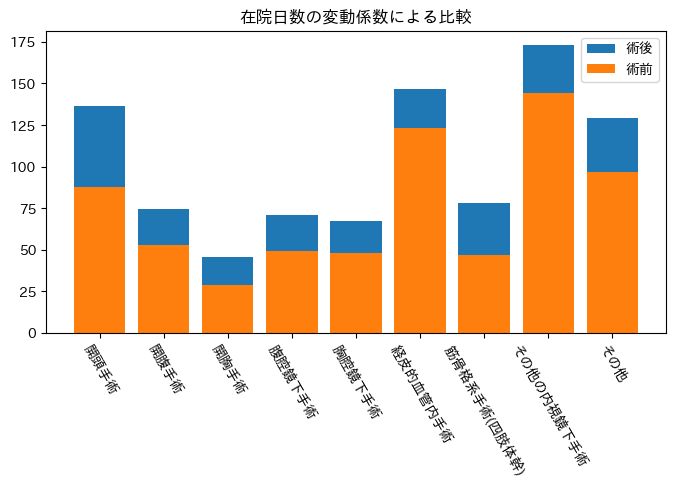

In [119]:
temp_before = data.query("期間 == '術前' & 分類 != '総数'")
temp_before = temp_before.sort_values('分類',ascending=False)

labels = temp_before['分類']
before_ope = temp_before['変動係数']

temp_after = data.query("期間 == '術後' & 分類 != '総数'")

after_ope = temp_after['変動係数']

total = [num1 + num2 for num1,num2 in zip(before_ope,after_ope)]

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
plt.xticks(rotation=-60)
plt.title('在院日数の変動係数による比較')
ax.bar(labels,total,label='術後')
ax.bar(labels,before_ope,label='術前')
ax.legend()